Dataset Shape: (5351, 198)
Features Shape: (5351, 178)
Labels Shape: (18,)
Features Summary:
           num_ibis  hrv_mean_nni  hrv_median_nni  hrv_range_nni     hrv_sdsd  \
count  5351.000000   5351.000000     5351.000000    5351.000000  5351.000000   
mean   2874.984393    871.896770      859.384424    1176.241470   144.594633   
std     914.851755    137.098531      152.378050     231.645517    68.230712   
min       0.000000    312.497018      312.500000       6.928223     0.238898   
25%    2271.000000    776.863354      746.610840    1015.656982    87.422923   
50%    2958.000000    848.051114      837.966064    1279.781738   137.010051   
75%    3466.500000    954.194275      957.001068    1357.837158   197.503526   
max    5817.000000   1337.485872     1382.904053    1673.585205   348.184858   

         hrv_rmssd   hrv_nni_50  hrv_pnni_50   hrv_nni_20  hrv_pnni_20  ...  \
count  5351.000000  5351.000000  5351.000000  5351.000000  5351.000000  ...   
mean    144.594672  1307.14

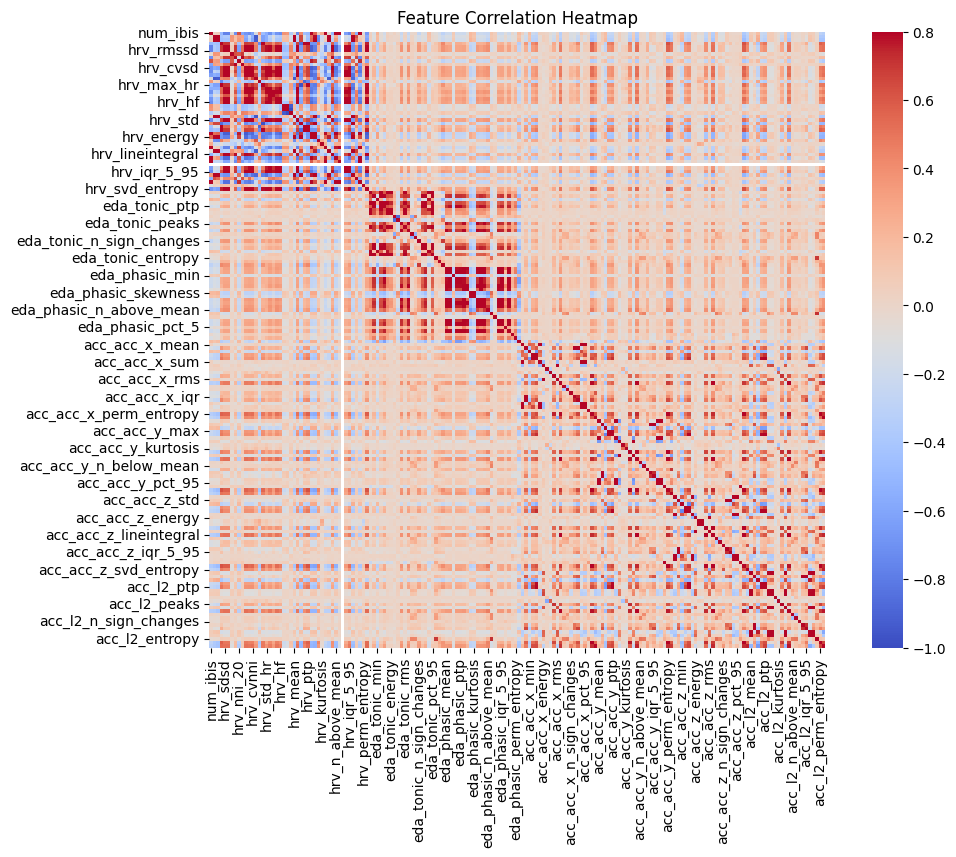


Explained Variance Ratio by PCA: [0.21779976 0.08933518 0.07619926 0.06276275 0.04532601 0.03449487
 0.02937265 0.02593914 0.02437839 0.01897342 0.0187839  0.01850753
 0.01538727 0.01511544 0.01326279 0.01295619 0.0115666  0.01082362
 0.01004675 0.00968336 0.00935531 0.00903738 0.00884031 0.00856587
 0.00819294 0.00784377 0.00755682 0.00729139 0.00664045 0.00651899
 0.00642869 0.00622366 0.00606258 0.00560067 0.00541838 0.00526268
 0.00522289 0.00498594 0.00481351 0.0046045  0.00450939 0.00438008
 0.0042514  0.00411392 0.0038585  0.00375557 0.00369424 0.0036397
 0.00339041 0.00330398 0.00319633 0.00310692 0.00287358 0.00275057
 0.00264634 0.00255605]
Number of Components to retain 95% variance: 56

Selected Features using RFE:
 Index(['hrv_mean_nni', 'hrv_pnni_20', 'hrv_iqr', 'eda_tonic_max',
       'eda_phasic_entropy', 'acc_acc_x_rms', 'acc_acc_x_pct_5',
       'acc_acc_x_pct_95', 'acc_acc_x_entropy', 'acc_acc_y_rms',
       'acc_acc_y_pct_5', 'acc_acc_y_pct_95', 'acc_acc_y_entropy'

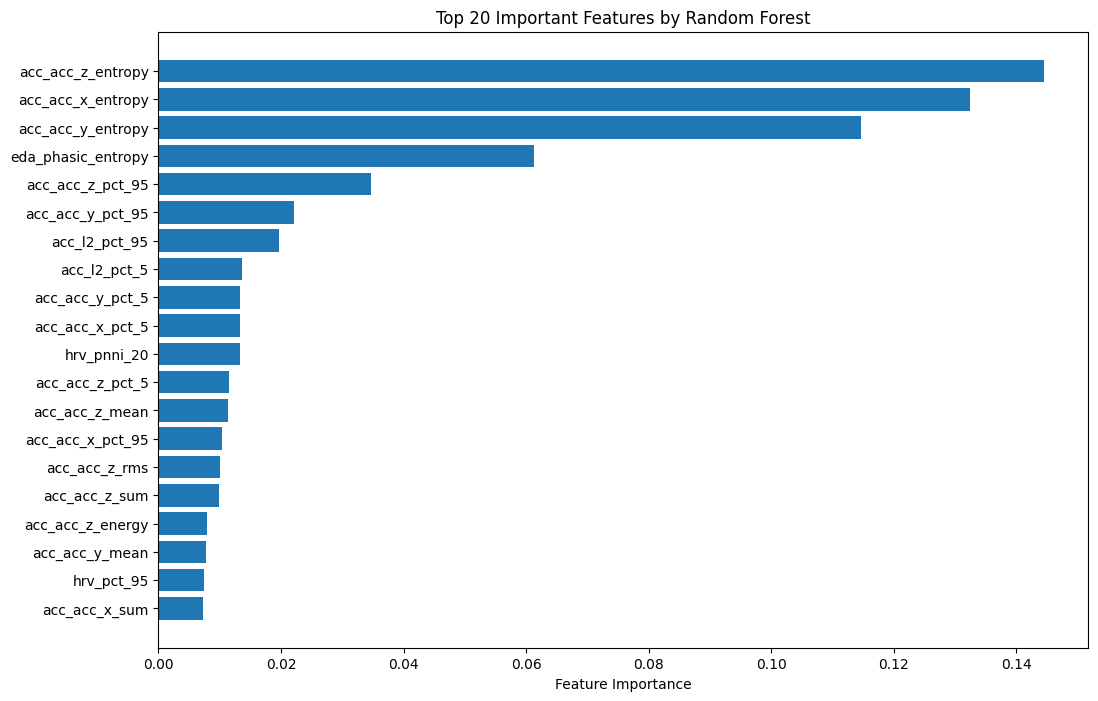

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('combined_data_imputed.csv')

# Separate features and labels
labels = data.filter(like='slider').columns  # Columns with labels
features = data.drop(columns=labels.tolist() + ['Timestamp', 'participant_id'])  # Drop labels and non-feature columns

# Exploratory Data Analysis
print("Dataset Shape:", data.shape)
print("Features Shape:", features.shape)
print("Labels Shape:", labels.shape)
print("Features Summary:\n", features.describe())

# Check for missing values
print("\nMissing Values per Feature:\n", data.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(features.corr(), cmap='coolwarm', vmax=0.8, square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# PCA for Dimensionality Reduction
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=0.95)  # Retain 95% variance
principal_components = pca.fit_transform(scaled_features)
print(f"\nExplained Variance Ratio by PCA: {pca.explained_variance_ratio_}")
print(f"Number of Components to retain 95% variance: {pca.n_components_}")

# Feature Importance and RFE
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, data[labels[0]], test_size=0.2, random_state=42
)

# Using Random Forest Regressor
model = RandomForestRegressor(random_state=42)
rfe = RFE(model, n_features_to_select=20)  # Select top 20 features
rfe.fit(X_train, y_train)

# Get selected feature rankings
selected_features = features.columns[rfe.support_]
print("\nSelected Features using RFE:\n", selected_features)

# Visualize importance
importances = model.fit(X_train, y_train).feature_importances_
sorted_idx = importances.argsort()[-20:]  # Top 20 important features
plt.figure(figsize=(12, 8))
plt.barh(features.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features by Random Forest")
plt.show()


Dataset Shape: (5351, 198)
Features Shape: (5351, 178)
Labels Shape: (18,)

Applying PCA...
Number of Components Selected to Retain 95% Variance: 56
Explained Variance Ratio of Each Component:
 [0.21779976 0.08933518 0.07619926 0.06276275 0.04532601 0.03449487
 0.02937265 0.02593914 0.02437839 0.01897342 0.0187839  0.01850753
 0.01538727 0.01511544 0.01326279 0.01295619 0.0115666  0.01082362
 0.01004675 0.00968336 0.00935531 0.00903738 0.00884031 0.00856587
 0.00819294 0.00784377 0.00755682 0.00729139 0.00664045 0.00651899
 0.00642869 0.00622366 0.00606258 0.00560067 0.00541838 0.00526268
 0.00522289 0.00498594 0.00481351 0.0046045  0.00450939 0.00438008
 0.0042514  0.00411392 0.0038585  0.00375557 0.00369424 0.0036397
 0.00339041 0.00330398 0.00319633 0.00310692 0.00287358 0.00275057
 0.00264634 0.00255605]
Cumulative Explained Variance:
 [0.21779976 0.30713494 0.3833342  0.44609695 0.49142296 0.52591783
 0.55529048 0.58122962 0.60560801 0.62458144 0.64336533 0.66187286
 0.67726014 0.

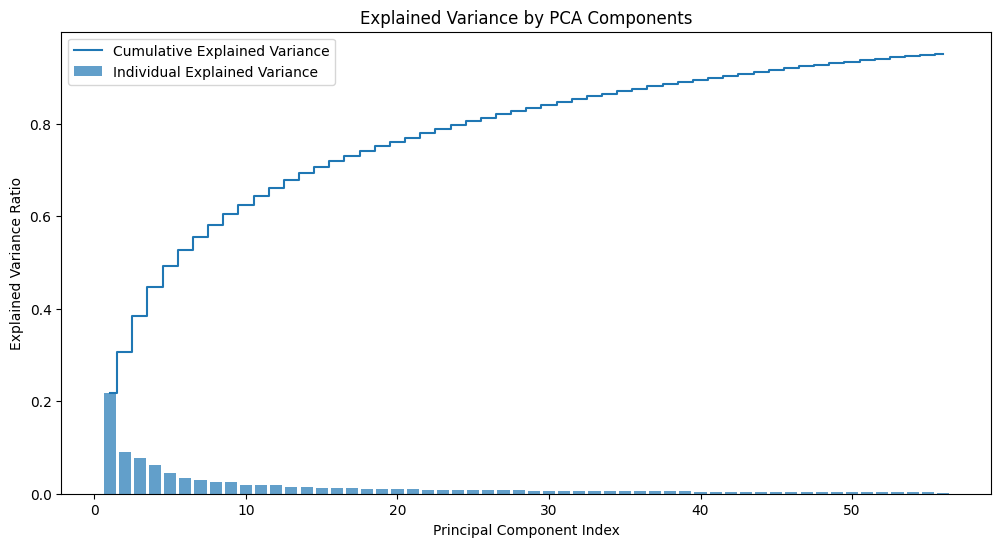


Feature Contributions (Loadings) to Each Principal Component:
                     PC1       PC2       PC3       PC4       PC5       PC6  \
num_ibis       -0.096609  0.026521 -0.116918 -0.082776  0.113073 -0.007912   
hrv_mean_nni   -0.076406  0.038816 -0.023408  0.071143 -0.277263 -0.025448   
hrv_median_nni -0.084921  0.037495 -0.023147  0.068122 -0.262657 -0.023857   
hrv_range_nni   0.119695 -0.061801  0.036968  0.001816  0.020657 -0.031699   
hrv_sdsd        0.135231 -0.035859  0.117195  0.060841 -0.023589  0.015210   
hrv_rmssd       0.135231 -0.035859  0.117195  0.060841 -0.023589  0.015210   
hrv_nni_50     -0.010777 -0.009699  0.021327  0.072998 -0.165101  0.009944   
hrv_pnni_50     0.071971 -0.025038  0.119047  0.116415 -0.176756  0.023315   
hrv_nni_20     -0.091344  0.018724 -0.080440 -0.014590 -0.045693 -0.006315   
hrv_pnni_20     0.046894 -0.018167  0.093881  0.114467 -0.207148  0.016350   

                     PC7       PC8       PC9      PC10  ...      PC47  \
num_i

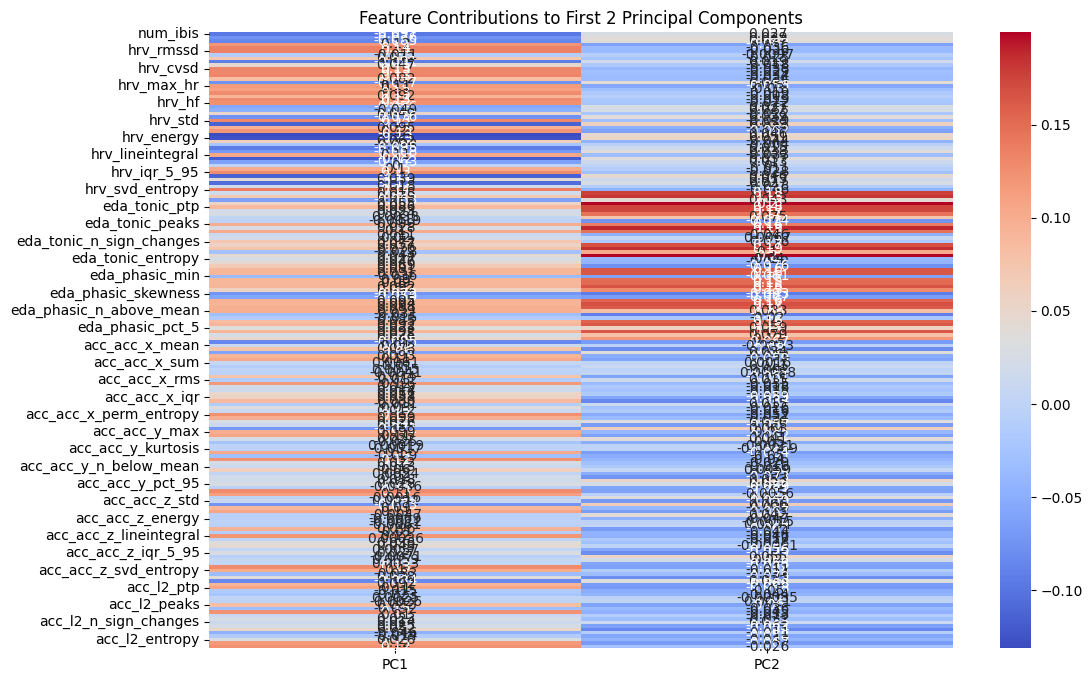

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # For progress bar

# Load dataset
data = pd.read_csv('combined_data_imputed.csv')

# Separate features and labels
labels = data.filter(like='slider').columns  # Columns with labels
features = data.drop(columns=labels.tolist() + ['Timestamp', 'participant_id'])  # Drop labels and non-feature columns

# Exploratory Data Analysis
print("Dataset Shape:", data.shape)
print("Features Shape:", features.shape)
print("Labels Shape:", labels.shape)

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA for Dimensionality Reduction
print("\nApplying PCA...")
pca = PCA(n_components=0.95)  # Retain 95% variance
principal_components = pca.fit_transform(scaled_features)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Number of Components Selected
print(f"Number of Components Selected to Retain 95% Variance: {pca.n_components_}")
print(f"Explained Variance Ratio of Each Component:\n {explained_variance_ratio}")
print(f"Cumulative Explained Variance:\n {cumulative_variance}")

# Plot Explained Variance and Cumulative Variance
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance by PCA Components')
plt.legend(loc='best')
plt.show()

# Loadings: Contribution of Each Feature to Principal Components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features.columns)
print("\nFeature Contributions (Loadings) to Each Principal Component:")
print(loadings.head(10))  # Show first 10 rows (features)

# Visualize Loadings for Top 2 Principal Components
plt.figure(figsize=(12, 8))
sns.heatmap(loadings.iloc[:, :2], annot=True, cmap="coolwarm", cbar=True)
plt.title("Feature Contributions to First 2 Principal Components")
plt.show()

In [8]:
# Splitting data for feature selection
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, data[labels[0]], test_size=0.2, random_state=42
)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # Faster than RandomForest

# Optimized RFE with larger step size
print("\nApplying Optimized RFE...")
model = LinearRegression()  # Lightweight model for faster execution
rfe = RFE(estimator=model, n_features_to_select=20, step=3)  # Remove 5 features at a time
with tqdm(total=len(features.columns)) as pbar:
    rfe.fit(X_train, y_train)
    pbar.update(len(features.columns) - 20)  # Update progress after selection

selected_features_rfe = features.columns[rfe.support_]
print("\nSelected Features using Optimized RFE:\n", selected_features_rfe)



Applying Optimized RFE...


 89%|████████▉ | 158/178 [00:00<00:00, 221.49it/s]


Selected Features using Optimized RFE:
 Index(['hrv_mean_nni', 'hrv_range_nni', 'hrv_sdsd', 'hrv_rmssd', 'hrv_sdnn',
       'hrv_total_power', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_mean', 'hrv_std',
       'hrv_min', 'hrv_max', 'hrv_ptp', 'hrv_rms', 'eda_phasic_max',
       'eda_phasic_ptp', 'eda_phasic_iqr_5_95', 'eda_phasic_pct_5',
       'eda_phasic_pct_95'],
      dtype='object')


In [9]:
# Univariate Feature Selection (ANOVA)
print("\nApplying Univariate Statistical Tests...")
select_k_best = SelectKBest(score_func=f_regression, k=20)  # Select top 20 features
select_k_best.fit(X_train, y_train)
selected_features_anova = features.columns[select_k_best.get_support()]
print("\nSelected Features using ANOVA:\n", selected_features_anova)


Applying Univariate Statistical Tests...

Selected Features using ANOVA:
 Index(['hrv_pnni_20', 'eda_tonic_mean', 'eda_tonic_sum', 'eda_tonic_rms',
       'eda_tonic_n_sign_changes', 'eda_tonic_pct_95', 'eda_tonic_svd_entropy',
       'acc_acc_x_entropy', 'acc_acc_x_svd_entropy', 'acc_acc_y_rms',
       'acc_acc_y_lineintegral', 'acc_acc_y_entropy', 'acc_acc_z_mean',
       'acc_acc_z_min', 'acc_acc_z_sum', 'acc_acc_z_lineintegral',
       'acc_acc_z_iqr_5_95', 'acc_acc_z_pct_5', 'acc_acc_z_entropy',
       'acc_l2_lineintegral'],
      dtype='object')



Calculating Feature Importance using Random Forest...

Top 20 Important Features by Random Forest:
 Index(['acc_acc_x_sum', 'hrv_pct_95', 'acc_acc_y_mean', 'acc_acc_z_energy',
       'acc_acc_z_sum', 'acc_acc_z_rms', 'acc_acc_x_pct_95', 'acc_acc_z_mean',
       'acc_acc_z_pct_5', 'hrv_pnni_20', 'acc_acc_x_pct_5', 'acc_acc_y_pct_5',
       'acc_l2_pct_5', 'acc_l2_pct_95', 'acc_acc_y_pct_95', 'acc_acc_z_pct_95',
       'eda_phasic_entropy', 'acc_acc_y_entropy', 'acc_acc_x_entropy',
       'acc_acc_z_entropy'],
      dtype='object')


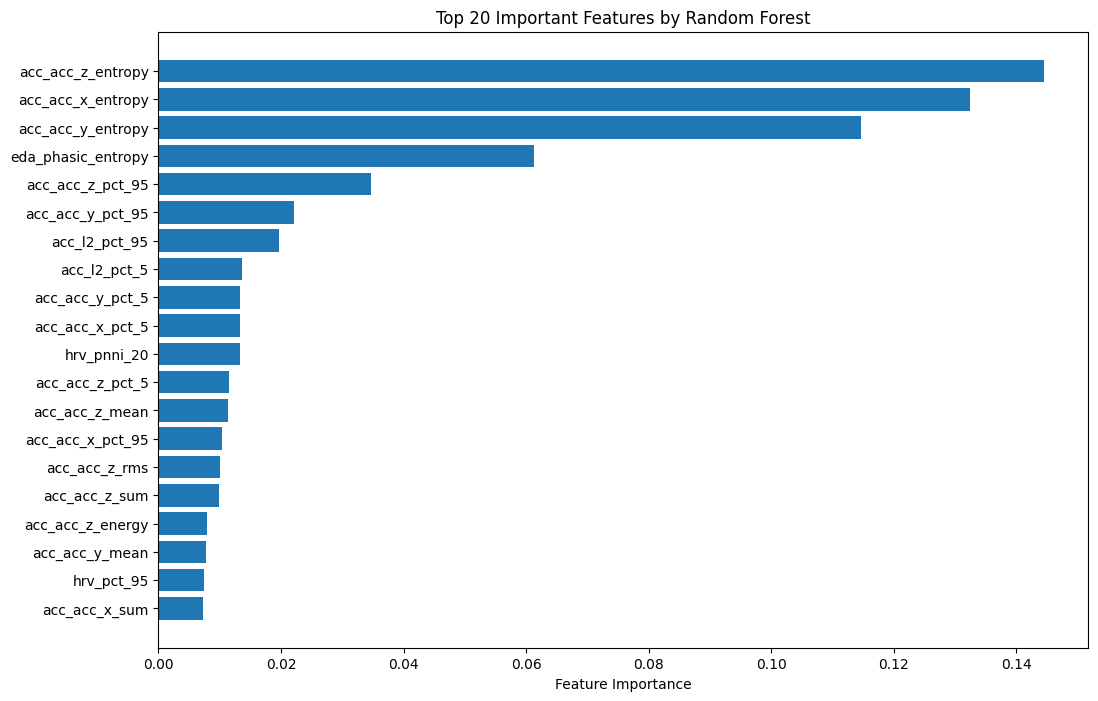

In [10]:
# Feature Importance using Tree-Based Models
print("\nCalculating Feature Importance using Random Forest...")
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[-20:]
important_features_rf = features.columns[sorted_idx]
print("\nTop 20 Important Features by Random Forest:\n", important_features_rf)

# Visualize feature importance
plt.figure(figsize=(12, 8))
plt.barh(features.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features by Random Forest")
plt.show()

In [11]:
# Lasso Feature Selection
print("\nApplying Lasso Regularization...")
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
selected_features_lasso = features.columns[np.abs(lasso.coef_) > 1e-5]
print("\nSelected Features using Lasso Regularization:\n", selected_features_lasso)


Applying Lasso Regularization...


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.275428820565139, tolerance: 1.504577570093457
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.492625776214481, tolerance: 1.504577570093457
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7349833753469284, tolerance: 1.504577570093457
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarni


Selected Features using Lasso Regularization:
 Index(['num_ibis', 'hrv_median_nni', 'hrv_nni_20', 'hrv_mean_hr', 'hrv_min_hr',
       'hrv_std_hr', 'hrv_total_power', 'hrv_lf', 'hrv_lf_hf_ratio', 'hrv_min',
       'hrv_max', 'hrv_skewness', 'hrv_lineintegral', 'hrv_n_above_mean',
       'hrv_n_below_mean', 'hrv_pct_5', 'hrv_pct_95', 'hrv_entropy',
       'hrv_perm_entropy', 'hrv_svd_entropy', 'eda_tonic_min',
       'eda_tonic_skewness', 'eda_tonic_rms', 'eda_tonic_lineintegral',
       'eda_tonic_n_above_mean', 'eda_tonic_n_below_mean',
       'eda_tonic_n_sign_changes', 'eda_tonic_iqr_5_95', 'eda_tonic_entropy',
       'eda_tonic_perm_entropy', 'eda_tonic_svd_entropy', 'eda_phasic_min',
       'eda_phasic_energy', 'eda_phasic_peaks', 'eda_phasic_n_above_mean',
       'eda_phasic_pct_5', 'eda_phasic_entropy', 'eda_phasic_perm_entropy',
       'eda_phasic_svd_entropy', 'acc_acc_x_std', 'acc_acc_x_min',
       'acc_acc_x_max', 'acc_acc_x_sum', 'acc_acc_x_energy',
       'acc_acc_x_skew

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215.01320130033127, tolerance: 1.5335277745327076
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251.63675044149386, tolerance: 1.5335277745327076
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.6994108039471, tolerance: 1.5335277745327076
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWa

In [12]:
# Mutual Information Feature Selection
print("\nApplying Mutual Information...")
mi = mutual_info_regression(X_train, y_train)
sorted_idx_mi = np.argsort(mi)[-20:]
important_features_mi = features.columns[sorted_idx_mi]
print("\nTop 20 Important Features by Mutual Information:\n", important_features_mi)


Applying Mutual Information...

Top 20 Important Features by Mutual Information:
 Index(['acc_l2_mean', 'eda_tonic_pct_5', 'acc_acc_y_mean', 'acc_acc_y_sum',
       'acc_acc_z_rms', 'acc_acc_x_sum', 'acc_acc_x_mean', 'acc_acc_z_energy',
       'acc_l2_pct_95', 'acc_l2_pct_5', 'acc_acc_z_sum', 'acc_acc_z_mean',
       'acc_acc_x_pct_5', 'acc_acc_y_pct_95', 'acc_acc_z_pct_95',
       'eda_tonic_entropy', 'acc_acc_z_entropy', 'acc_acc_x_entropy',
       'eda_phasic_entropy', 'acc_acc_y_entropy'],
      dtype='object')


In [13]:
# Progressively visualize selected features
all_selected_features = {
    "RFE": selected_features_rfe,
    "ANOVA": selected_features_anova,
    "Random Forest": important_features_rf,
    "Lasso": selected_features_lasso,
    "Mutual Information": important_features_mi,
}

for method, features_set in all_selected_features.items():
    print(f"\nSelected Features by {method}:\n", features_set)


Selected Features by RFE:
 Index(['hrv_mean_nni', 'hrv_range_nni', 'hrv_sdsd', 'hrv_rmssd', 'hrv_sdnn',
       'hrv_total_power', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_mean', 'hrv_std',
       'hrv_min', 'hrv_max', 'hrv_ptp', 'hrv_rms', 'eda_phasic_max',
       'eda_phasic_ptp', 'eda_phasic_iqr_5_95', 'eda_phasic_pct_5',
       'eda_phasic_pct_95'],
      dtype='object')

Selected Features by ANOVA:
 Index(['hrv_pnni_20', 'eda_tonic_mean', 'eda_tonic_sum', 'eda_tonic_rms',
       'eda_tonic_n_sign_changes', 'eda_tonic_pct_95', 'eda_tonic_svd_entropy',
       'acc_acc_x_entropy', 'acc_acc_x_svd_entropy', 'acc_acc_y_rms',
       'acc_acc_y_lineintegral', 'acc_acc_y_entropy', 'acc_acc_z_mean',
       'acc_acc_z_min', 'acc_acc_z_sum', 'acc_acc_z_lineintegral',
       'acc_acc_z_iqr_5_95', 'acc_acc_z_pct_5', 'acc_acc_z_entropy',
       'acc_l2_lineintegral'],
      dtype='object')

Selected Features by Random Forest:
 Index(['acc_acc_x_sum', 'hrv_pct_95', 'acc_acc_y_mean', 'acc_acc_z_energy'

In [15]:
import pandas as pd

# Combine selected features into a comparison table
all_features = list(
    selected_features_rfe.tolist()
    + selected_features_anova.tolist()
    + important_features_rf.tolist()
    + selected_features_lasso.tolist()
    + important_features_mi.tolist()
)  # Convert set to list to avoid errors

# Ensure the feature list is unique
all_features = sorted(set(all_features))  # Sorting ensures a consistent order

# Create a DataFrame for feature selection results
feature_summary = pd.DataFrame(index=all_features)
feature_summary['RFE'] = feature_summary.index.isin(selected_features_rfe).astype(int)
feature_summary['ANOVA'] = feature_summary.index.isin(selected_features_anova).astype(int)
feature_summary['Random Forest'] = feature_summary.index.isin(important_features_rf).astype(int)
feature_summary['Lasso'] = feature_summary.index.isin(selected_features_lasso).astype(int)
feature_summary['Mutual Information'] = feature_summary.index.isin(important_features_mi).astype(int)

# Display the first 20 rows for easier reading
print(feature_summary.head(20))

# Save to CSV for further exploration
feature_summary.to_csv("feature_selection_summary.csv")


                          RFE  ANOVA  Random Forest  Lasso  Mutual Information
acc_acc_x_energy            0      0              0      1                   0
acc_acc_x_entropy           0      1              1      1                   1
acc_acc_x_kurtosis          0      0              0      1                   0
acc_acc_x_lineintegral      0      0              0      1                   0
acc_acc_x_max               0      0              0      1                   0
acc_acc_x_mean              0      0              0      0                   1
acc_acc_x_min               0      0              0      1                   0
acc_acc_x_n_above_mean      0      0              0      1                   0
acc_acc_x_n_sign_changes    0      0              0      1                   0
acc_acc_x_pct_5             0      0              1      0                   1
acc_acc_x_pct_95            0      0              1      0                   0
acc_acc_x_peaks             0      0              0 

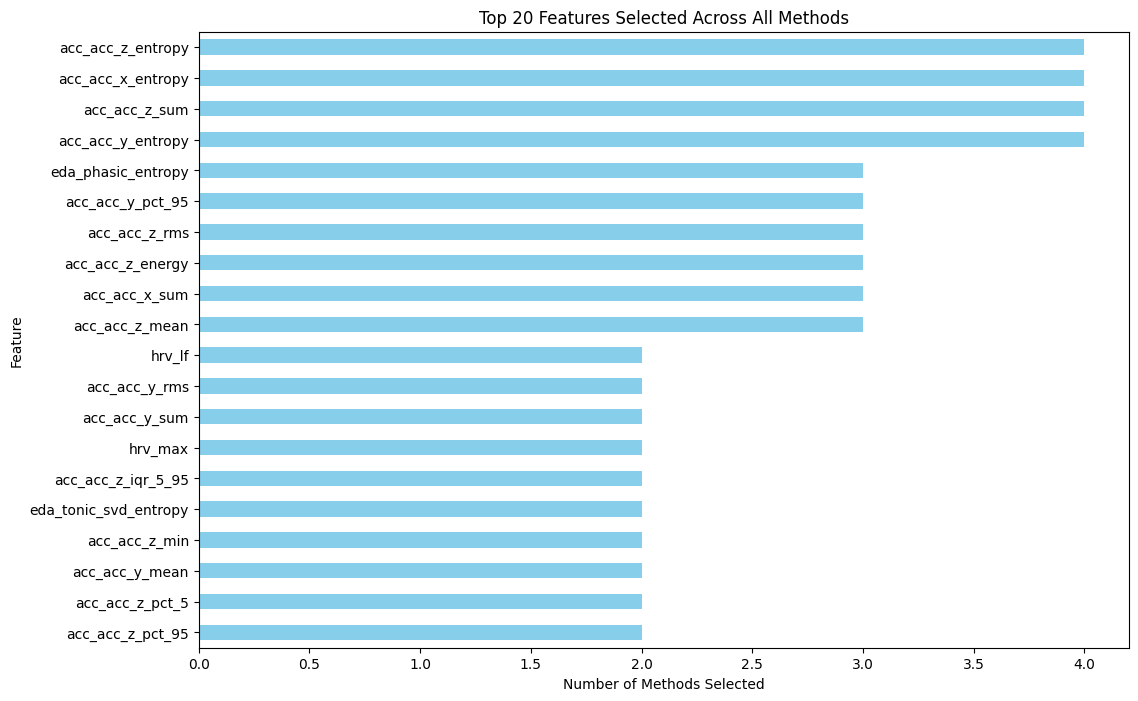

In [16]:
# Count how many times each feature was selected across all methods
feature_summary['Total Selected'] = feature_summary.sum(axis=1)

# Sort features by selection frequency
most_selected_features = feature_summary['Total Selected'].sort_values(ascending=False).head(20)

# Plot the most frequently selected features
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
most_selected_features.plot(kind='barh', color='skyblue')
plt.xlabel("Number of Methods Selected")
plt.ylabel("Feature")
plt.title("Top 20 Features Selected Across All Methods")
plt.gca().invert_yaxis()
plt.show()


In [17]:
# Filter features selected by at least 2 methods
overlapping_features = feature_summary[feature_summary['Total Selected'] > 1]
print("Features selected by at least two methods:\n", overlapping_features)


Features selected by at least two methods:
                           RFE  ANOVA  Random Forest  Lasso  \
acc_acc_x_entropy           0      1              1      1   
acc_acc_x_pct_5             0      0              1      0   
acc_acc_x_sum               0      0              1      1   
acc_acc_x_svd_entropy       0      1              0      1   
acc_acc_y_entropy           0      1              1      1   
acc_acc_y_mean              0      0              1      0   
acc_acc_y_pct_95            0      0              1      1   
acc_acc_y_rms               0      1              0      1   
acc_acc_y_sum               0      0              0      1   
acc_acc_z_energy            0      0              1      1   
acc_acc_z_entropy           0      1              1      1   
acc_acc_z_iqr_5_95          0      1              0      1   
acc_acc_z_mean              0      1              1      0   
acc_acc_z_min               0      1              0      1   
acc_acc_z_pct_5           


Training Multi-Output Regressor with Progress Tracking...


Training Progress: 100%|██████████| 18/18 [36:21<00:00, 121.22s/it]



Making Predictions with Multi-Output Regressor...
Mean Squared Error (Multi-Output Regression): 1.0111677435462498

Training Multi-Output Classifier with Progress Tracking...


Training Progress: 100%|██████████| 18/18 [07:39<00:00, 25.52s/it]



Making Predictions with Multi-Output Classifier...


Prediction Progress: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]


Accuracy for P1 (sliderNeutralPos): 0.7796
Accuracy for N1 (sliderNeutralPos): 0.8394
Accuracy for P2 (sliderNeutralPos): 0.7824
Accuracy for N2 (sliderNeutralPos): 0.8077
Accuracy for N3 (sliderNeutralPos): 0.8002
Accuracy for P3 (sliderNeutralPos): 0.8170
Accuracy for SE1 (sliderNegPos): 0.8665
Accuracy for SE2 (sliderNeutralPos): 0.8478
Accuracy for SE3 (sliderNeutralPos): 0.8431
Accuracy for SE4 (sliderNeutralPos): 0.8347
Accuracy for MIL1 (sliderNegPos): 0.8609
Accuracy for MIL2 (sliderNeutralPos): 0.8245
Accuracy for MIL3 (sliderNeutralPos): 0.8189
Accuracy for MIL4 (sliderNeutralPos): 0.8011
Accuracy for MIL5 (sliderNeutralPos): 0.8235
Accuracy for PRO1 (sliderNeutralPos): 0.8161
Accuracy for PRO2 (sliderNeutralPos): 0.8217
Accuracy for PRO3 (sliderNeutralPos): 0.8179

Average Accuracy (Multi-Output Classification): 0.8223882145450774


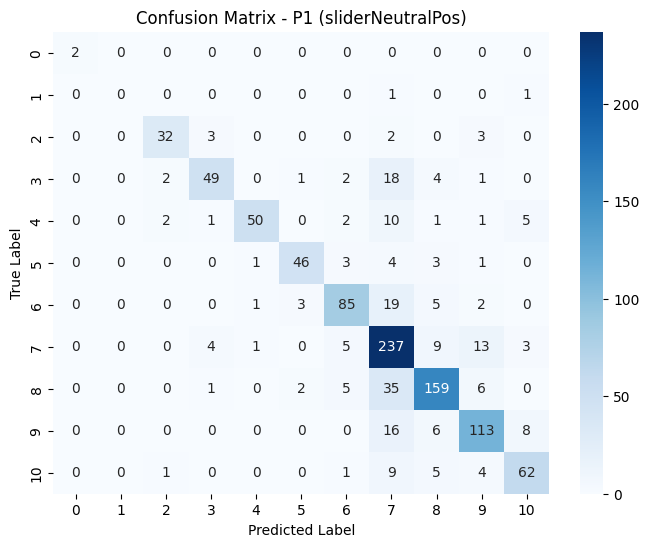

In [21]:
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm  # For progress tracking

# Load the dataset
data = pd.read_csv('combined_data_imputed.csv')

# Identify features and multi-label target
selected_features = [
    'acc_acc_x_entropy', 'acc_acc_x_pct_5', 'acc_acc_x_sum', 'acc_acc_x_svd_entropy',
    'acc_acc_y_entropy', 'acc_acc_y_mean', 'acc_acc_y_pct_95', 'acc_acc_y_rms',
    'acc_acc_y_sum', 'acc_acc_z_energy', 'acc_acc_z_entropy', 'acc_acc_z_iqr_5_95',
    'acc_acc_z_mean', 'acc_acc_z_min', 'acc_acc_z_pct_5', 'acc_acc_z_pct_95',
    'acc_acc_z_rms', 'acc_acc_z_sum', 'acc_l2_pct_5', 'acc_l2_pct_95',
    'eda_phasic_entropy', 'eda_phasic_pct_5', 'eda_tonic_entropy', 'eda_tonic_n_sign_changes',
    'eda_tonic_rms', 'eda_tonic_svd_entropy', 'hrv_lf', 'hrv_max', 'hrv_min',
    'hrv_pct_95', 'hrv_pnni_20', 'hrv_total_power'
]
target_labels = [col for col in data.columns if "slider" in col]

# Separate features and labels
X = data[selected_features]
y = data[target_labels]

# Handle missing data (if any)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Progress Bar for Multi-Output Regressor
print("\nTraining Multi-Output Regressor with Progress Tracking...")
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
multi_regressor = MultiOutputRegressor(rf_regressor)

with tqdm(total=len(target_labels), desc="Training Progress") as pbar:
    for i, label in enumerate(target_labels):
        multi_regressor.fit(X_train, y_train)
        pbar.update(1)

# Predictions for Multi-Output Regressor
print("\nMaking Predictions with Multi-Output Regressor...")
y_pred_reg = multi_regressor.predict(X_test)

# Evaluate Multi-Output Regression
mse = mean_squared_error(y_test, y_pred_reg, multioutput='uniform_average')
print("Mean Squared Error (Multi-Output Regression):", mse)

# Progress Bar for Multi-Output Classifier
print("\nTraining Multi-Output Classifier with Progress Tracking...")
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
multi_classifier = MultiOutputClassifier(rf_classifier)

with tqdm(total=len(target_labels), desc="Training Progress") as pbar:
    for i, label in enumerate(target_labels):
        multi_classifier.fit(X_train, y_train)
        pbar.update(1)

# Predictions for Multi-Output Classifier
print("\nMaking Predictions with Multi-Output Classifier...")
with tqdm(total=1, desc="Prediction Progress") as pbar:
    y_pred_clf = multi_classifier.predict(X_test)  # Predict for all labels at once
    pbar.update(1)

# Evaluate Multi-Output Classification
accuracy_scores = []
for i, label in enumerate(target_labels):
    acc = accuracy_score(y_test.iloc[:, i], y_pred_clf[:, i])
    accuracy_scores.append(acc)
    print(f"Accuracy for {label}: {acc:.4f}")

print("\nAverage Accuracy (Multi-Output Classification):", np.mean(accuracy_scores))

# Confusion Matrix for the First Label
conf_matrix = confusion_matrix(y_test[target_labels[0]], y_pred_clf[:, 0])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {target_labels[0]}')
plt.show()


In [22]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Evaluate Multi-Output Classifier using Cross-Validation
print("\nCross-Validating Multi-Output Classifier...")
scores = []
for i, label in enumerate(target_labels):
    # Perform k-fold cross-validation for each label
    cv_scores = cross_val_score(
        RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10),
        X_scaled,
        y[label],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    print(f"Cross-Validation Accuracy for {label}: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    scores.append(np.mean(cv_scores))

print("\nAverage Cross-Validation Accuracy Across All Labels:", np.mean(scores))



Cross-Validating Multi-Output Classifier...
Cross-Validation Accuracy for P1 (sliderNeutralPos): 0.1964 ± 0.0146
Cross-Validation Accuracy for N1 (sliderNeutralPos): 0.3499 ± 0.0492
Cross-Validation Accuracy for P2 (sliderNeutralPos): 0.2063 ± 0.0458
Cross-Validation Accuracy for N2 (sliderNeutralPos): 0.3398 ± 0.0457
Cross-Validation Accuracy for N3 (sliderNeutralPos): 0.2246 ± 0.0593
Cross-Validation Accuracy for P3 (sliderNeutralPos): 0.1992 ± 0.0169
Cross-Validation Accuracy for SE1 (sliderNegPos): 0.3752 ± 0.1334
Cross-Validation Accuracy for SE2 (sliderNeutralPos): 0.3930 ± 0.0387
Cross-Validation Accuracy for SE3 (sliderNeutralPos): 0.2669 ± 0.0380
Cross-Validation Accuracy for SE4 (sliderNeutralPos): 0.4014 ± 0.0721
Cross-Validation Accuracy for MIL1 (sliderNegPos): 0.2555 ± 0.0846
Cross-Validation Accuracy for MIL2 (sliderNeutralPos): 0.2839 ± 0.0787
Cross-Validation Accuracy for MIL3 (sliderNeutralPos): 0.2172 ± 0.0636
Cross-Validation Accuracy for MIL4 (sliderNeutralPos): 0

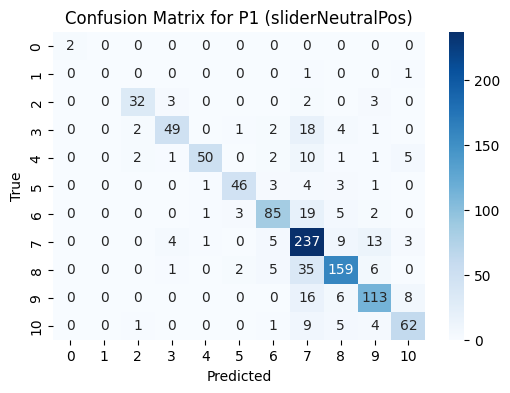

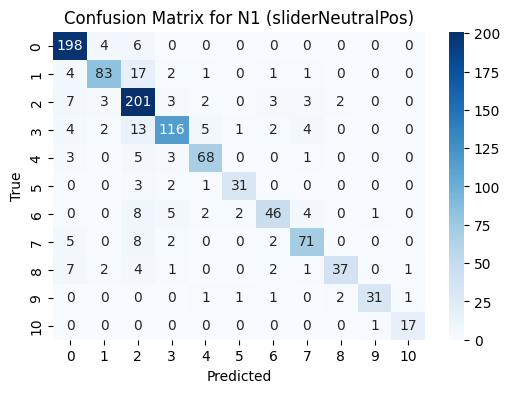

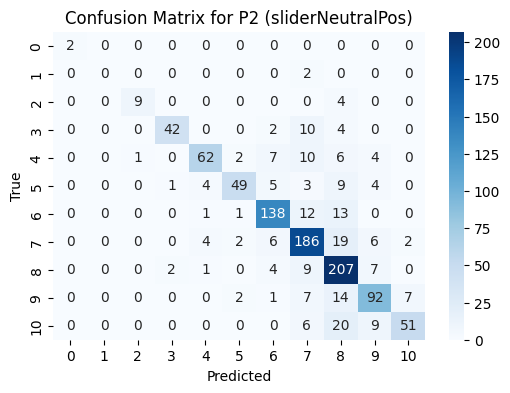

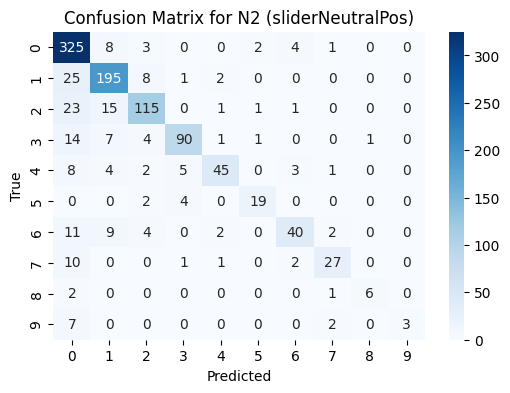

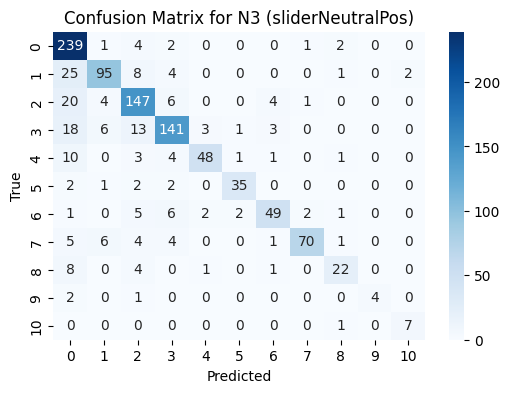

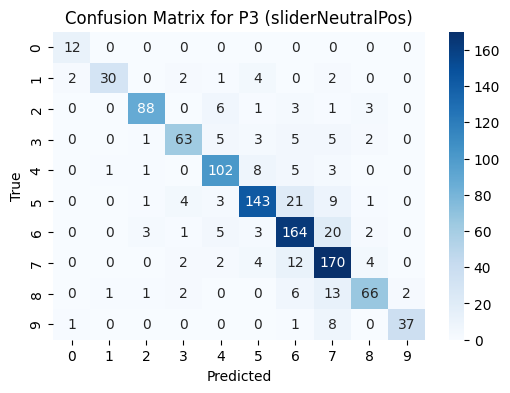

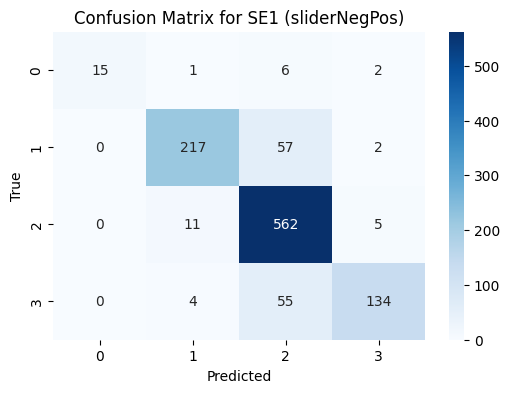

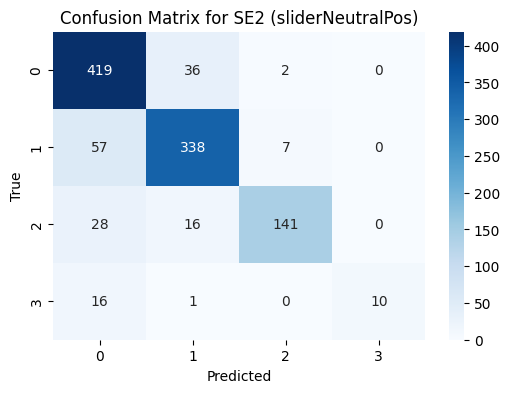

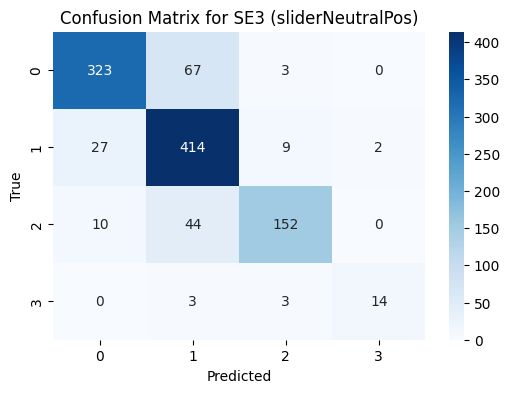

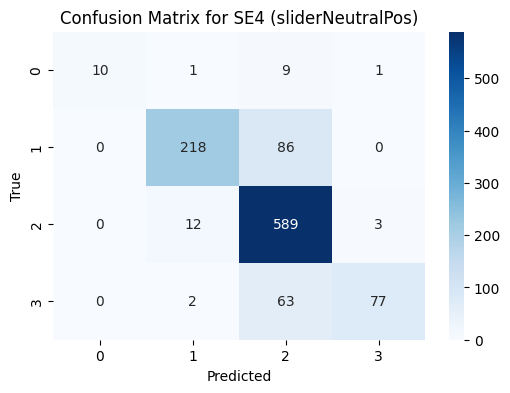

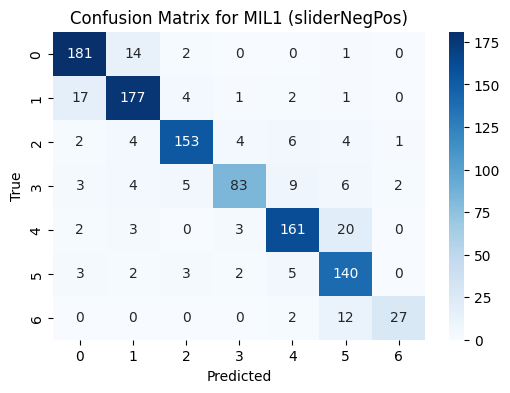

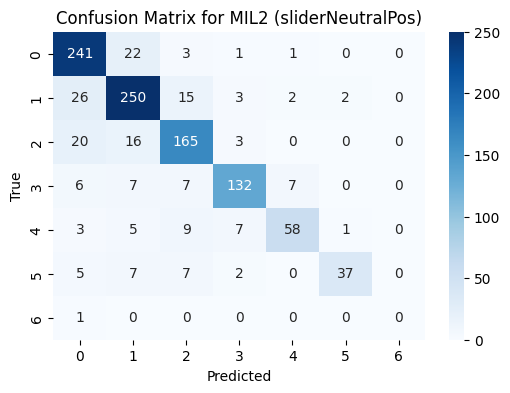

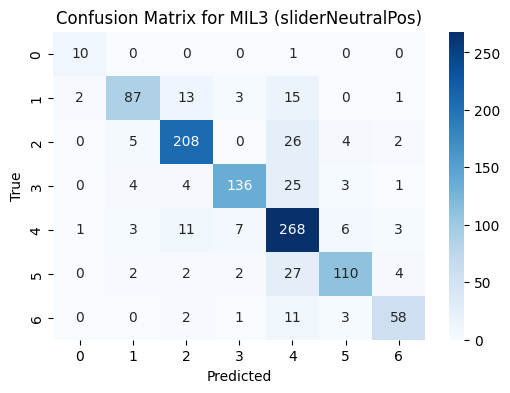

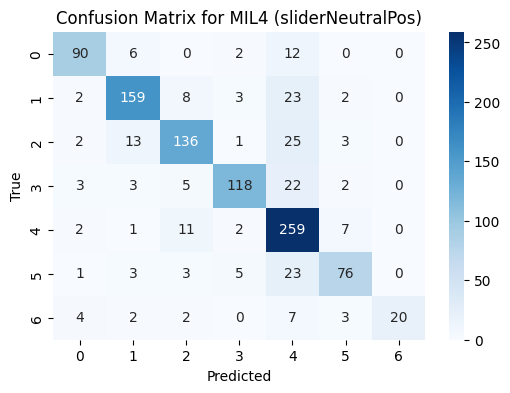

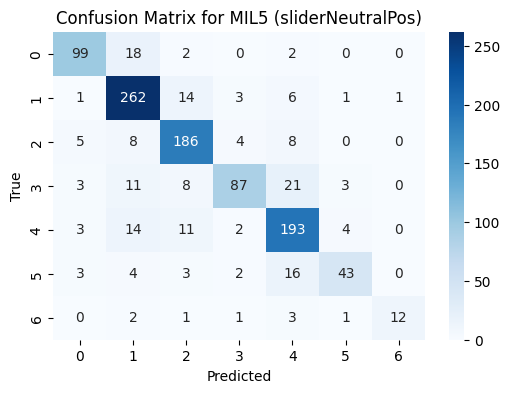

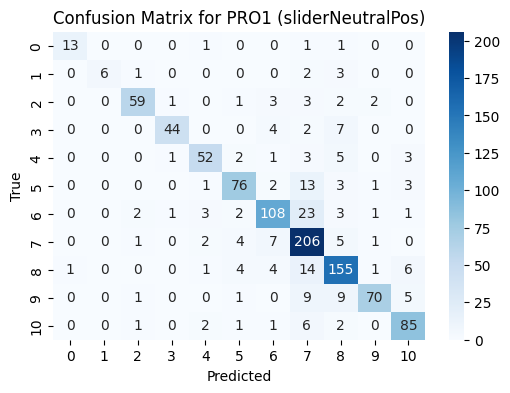

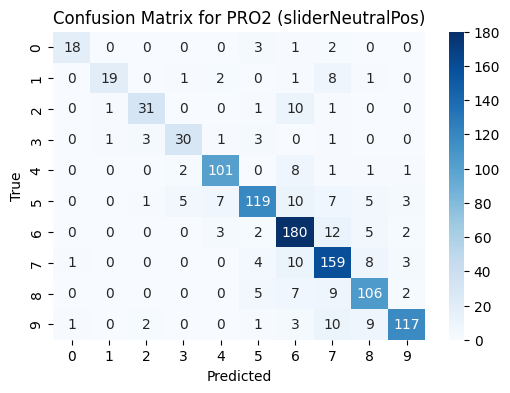

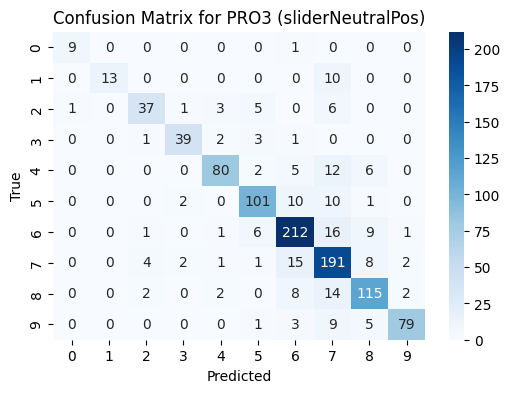

In [23]:
for i, label in enumerate(target_labels):
    conf_matrix = confusion_matrix(y_test[label], y_pred_clf[:, i])
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {label}')
    plt.show()


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("\nDetailed Metrics Per Label:")
for i, label in enumerate(target_labels):
    precision = precision_score(y_test[label], y_pred_clf[:, i], average='weighted')
    recall = recall_score(y_test[label], y_pred_clf[:, i], average='weighted')
    f1 = f1_score(y_test[label], y_pred_clf[:, i], average='weighted')
    print(f"{label}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")



Detailed Metrics Per Label:
P1 (sliderNeutralPos): Precision=0.7920, Recall=0.7796, F1-Score=0.7796
N1 (sliderNeutralPos): Precision=0.8438, Recall=0.8394, F1-Score=0.8379
P2 (sliderNeutralPos): Precision=0.7935, Recall=0.7824, F1-Score=0.7802
N2 (sliderNeutralPos): Precision=0.8150, Recall=0.8077, F1-Score=0.8024
N3 (sliderNeutralPos): Precision=0.8118, Recall=0.8002, F1-Score=0.7987
P3 (sliderNeutralPos): Precision=0.8250, Recall=0.8170, F1-Score=0.8175
SE1 (sliderNegPos): Precision=0.8773, Recall=0.8665, F1-Score=0.8629
SE2 (sliderNeutralPos): Precision=0.8559, Recall=0.8478, F1-Score=0.8450
SE3 (sliderNeutralPos): Precision=0.8516, Recall=0.8431, F1-Score=0.8427
SE4 (sliderNeutralPos): Precision=0.8559, Recall=0.8347, F1-Score=0.8264
MIL1 (sliderNegPos): Precision=0.8648, Recall=0.8609, F1-Score=0.8603
MIL2 (sliderNeutralPos): Precision=0.8274, Recall=0.8245, F1-Score=0.8230
MIL3 (sliderNeutralPos): Precision=0.8302, Recall=0.8189, F1-Score=0.8195
MIL4 (sliderNeutralPos): Precisio

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Predict Probabilities for Random Forest
y_pred_proba = multi_classifier.predict_proba(X_test)

# Display probabilities for the first label
print(f"Prediction Probabilities for {target_labels[0]}:\n", y_pred_proba[0][:5])  # First 5 samples


Prediction Probabilities for P1 (sliderNeutralPos):
 [[2.90340189e-02 0.00000000e+00 4.97005005e-02 4.67680773e-02
  2.61721398e-02 1.15064318e-01 1.04206797e-01 1.80509520e-01
  4.91309760e-02 3.63965033e-01 3.54486195e-02]
 [6.98205551e-04 0.00000000e+00 1.51486585e-02 8.17361259e-02
  1.38647831e-02 6.30334941e-03 2.67104476e-02 7.13173659e-01
  9.00105692e-02 3.70474048e-02 1.53067966e-02]
 [2.17205214e-03 4.19724027e-04 4.95448230e-02 2.32331926e-02
  3.06225364e-02 3.54628271e-02 5.15548377e-02 2.97700763e-01
  1.20971324e-01 3.41214449e-01 4.71034709e-02]
 [4.44944481e-04 3.73134328e-05 3.76410943e-03 2.31356350e-02
  2.08476118e-02 1.52123589e-02 4.70923875e-02 1.45017018e-01
  5.88521755e-01 1.25020098e-01 3.09067695e-02]
 [1.36514534e-02 0.00000000e+00 8.08633140e-03 8.57344251e-02
  3.38868339e-02 9.30271648e-03 1.43737718e-01 4.32702327e-01
  1.61311843e-01 6.57205388e-02 4.58658129e-02]]


In [26]:
importances = rf_classifier.feature_importances_
sorted_idx = np.argsort(importances)[-20:]  # Top 20 important features
plt.figure(figsize=(12, 8))
plt.barh([selected_features[i] for i in sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features for Random Forest")
plt.show()


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.